### In this project we are going to analyse project 5

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline

1. First we manually download the given data known as twitter-archive-enhanced

In [2]:
twitterArchive=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitterArchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. With the help of request library we are going to download the file.

In [4]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [5]:
response=requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [6]:
ImagePre=pd.read_csv('image_predictions.tsv', sep='\t')

In [7]:
ImagePre.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. As i coudnt get verified from twitter for verifying my developers account i chose to use the txt file already given to us

In [8]:
jsontweet=[]
with open('tweet-json1.txt', mode='r') as file:
    first=file.readline()
    while first:
        data=json.loads(first)
        Dict= {
            'tweet_id': str(data['id']),
            'retweet_count': int(data['retweet_count']),
            'favorite_count': int(data['favorite_count']),
            'user_followers': int(data['user']['followers_count'])
        }
        jsontweet.append(Dict)
        first=file.readline()
        
    
    

In [9]:
tweetdata=pd.DataFrame(jsontweet,columns= ['tweet_id',
                                              'retweet_count',
                                              'favorite_count',
                                           'user_followers'
                                          ])

In [10]:
tweetdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
user_followers    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [11]:
tweetdata.to_csv('tweetdata.csv',index=False)

### Ending of Gathering Data

#### Here we gathered 3 files:-

* twitter-archive-enhanced.csv - which was already provided to us
* image_predictions.tsv -Which was hosted by udacity
* tweetdata.csv - which i made from the json file provided

### Before we move ahead lets load all three data in our data frames

In [12]:
twitterArchive=pd.read_csv('twitter-archive-enhanced.csv')
ImagePre=pd.read_csv('image_predictions.tsv', sep='\t')
dftweet=pd.read_csv('tweetdata.csv')

## Assessing the data
<br>
<br>
In this step we will first start with visual assessment and prgramatic assesment of Data

<b> 1. Twitter Archived Enhanced Data</b>

In [13]:
twitterArchive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
twitterArchive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [15]:
twitterArchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
twitterArchive.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

In [17]:
dfa=twitterArchive.name.value_counts()

In [18]:
dfa.sample(60)

Tove         1
Jeph         2
Oscar        6
Sunny        5
Rosie        3
Devón        1
Rocky        2
Juno         2
Gilbert      1
Huck         1
Klevin       3
Percy        2
Axel         2
Rueben       1
Blipson      1
Gidget       2
Ralphie      1
Julius       1
Mike         1
Jarvis       1
Kenneth      2
Darrel       1
Ambrose      1
Cilantro     1
Malikai      1
Gizmo        3
Orion        1
Hank         4
Marvin       1
Kellogg      1
Sarge        2
Milky        1
Sailor       1
Rey          1
Kawhi        1
Reese        3
Harvey       1
Antony       1
Crumpet      1
Jo           1
Maisey       1
Donny        1
Toby         7
Karl         1
Lilli        1
Hubertson    1
Cassie       4
Bauer        1
Brat         1
Karll        1
Sephie       1
Hamrick      1
Phil         5
Oreo         1
Linus        1
Rumpole      1
Izzy         1
Jessiga      1
Smiley       1
Doc          2
Name: name, dtype: int64

### Notes
<li> In some columns we need to change None to Nan.
<li> Some numerator and Denominator values are wrong.
<li> None is considered to be name of the dog 745, also a is repeated 55 times.
<li> During Random Sampling i also found various names of the owner to be by,my,link,very(5),actually,all,the(8),in.
<li> Incorrect Data types for Date .<br>
<b>Tidiness</b>
        - We must change the tweetid to int so that we can merge all three.
        

<b> 2. Image Prediction</b>

In [19]:
ImagePre.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
ImagePre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
ImagePre.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
ImagePre.jpg_url.nunique()

2009

Quality Issues:
    1. The data type for predictions should be catagorical data type
    2. confidence columns should be merged
    3. There are 66 same urls
    4. Delete columns that wont be needed.

<b> 3. Tweets</b>

In [23]:
dftweet.head()

,tweet_id,retweet_count,favorite_count,user_followers
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [24]:
dftweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
user_followers    2354 non-null int64
dtypes: int64(4)
memory usage: 73.7 KB


# Cleaning data

In [25]:
dftweetclean=dftweet.copy()
ImagePreclean=ImagePre.copy()
twitterArchiveclean=twitterArchive.copy()

## Define
Drop all rows containing retweets<br>
## Code

In [26]:
twitterArchiveclean = twitterArchiveclean[pd.isnull(twitterArchiveclean['retweeted_status_user_id'])]

## Test

In [27]:
twitterArchiveclean.info()
twitterArchiveclean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


## Define
Dropping all columns related to retweet

## Code

In [28]:
twitterArchiveclean=twitterArchiveclean.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis = 1)

## Test

In [29]:
twitterArchiveclean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

## Define
Fix the incorrect Data type<br>
## Code

In [30]:
twitterArchiveclean['timestamp']=pd.to_datetime(twitterArchiveclean['timestamp'])

## Test

In [31]:
twitterArchiveclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns, UTC]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB


## Define
Erroneous Datatypes for dogs<br>
## Code

In [32]:
dogss = ['doggo', 'floofer', 'pupper', 'puppo']
retain = [x for x in twitterArchiveclean.columns.tolist() if x not in dogss]

twitterArchiveclean = pd.melt(twitterArchiveclean, id_vars = retain, value_vars = dogss, 
                         var_name = 'dogs', value_name = 'dogs_stage')
twitterArchiveclean= twitterArchiveclean.drop('dogs', 1)
twitterArchiveclean = twitterArchiveclean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')
                            

## Test

In [33]:
twitterArchiveclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns, UTC]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dogs_stage               2175 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(5)
memory usage: 203.9+ KB


## Define
Correct the numerator and denominator<br>
## Code

In [34]:
twitterArchiveclean.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2153
11        2
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [35]:
twitterArchiveclean=twitterArchiveclean.query('rating_denominator==10')

In [36]:
twitterArchiveclean.rating_numerator.value_counts().sort_index()

0         2
1         7
2         9
3        19
4        15
5        36
6        32
7        53
8        98
9       155
10      442
11      425
12      500
13      307
14       43
15        1
17        1
26        1
27        1
75        1
182       1
420       2
666       1
1776      1
Name: rating_numerator, dtype: int64

In [37]:
twitterArchiveclean=twitterArchiveclean.query('rating_numerator<15')

## Test

In [38]:
twitterArchiveclean.rating_numerator.value_counts().sort_index()

0       2
1       7
2       9
3      19
4      15
5      36
6      32
7      53
8      98
9     155
10    442
11    425
12    500
13    307
14     43
Name: rating_numerator, dtype: int64

## Define
Duplicated image url's must be dropped
## Code

In [39]:
ImagePreclean.drop_duplicates(subset=['jpg_url'],inplace=True, keep='last')

## Test

In [40]:
ImagePreclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


## Define
Combining p1,p2,p3
## Code

In [41]:
con=[]
pred=[]

def getp(ImagePrep):
    if ImagePrep.p1_dog == True:
        pred.append(ImagePrep.p1)
        con.append(ImagePrep.p1_conf)
    elif ImagePrep.p2_dog == True:
        pred.append(ImagePrep.p2)
        con.append(ImagePrep.p2_conf)
    elif ImagePrep.p3_dog == True:
        pred.append(ImagePrep.p3)
        con.append(ImagePrep.p3_conf)
    else:
        pred.append('NaN')
        con.append(0)
ImagePreclean.apply(getp, axis=1)

    

    

0       None
1       None
2       None
3       None
4       None
        ... 
2070    None
2071    None
2072    None
2073    None
2074    None
Length: 2009, dtype: object

In [42]:
ImagePreclean['prediction']=pred
ImagePreclean['confidence']=con


In [43]:
ImagePreclean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],axis=1,inplace=True)

In [44]:
ImagePreclean.drop(['img_num'],axis=1,inplace=True)

## Test

In [45]:
ImagePreclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id      2009 non-null int64
jpg_url       2009 non-null object
prediction    2009 non-null object
confidence    2009 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 78.5+ KB


In [46]:
ImagePreclean.nunique()

tweet_id      2009
jpg_url       2009
prediction     114
confidence    1689
dtype: int64

## Define
Merging Data together
## Code

In [47]:
data=pd.merge(twitterArchiveclean, ImagePreclean, how='left', on=['tweet_id'])

In [48]:
data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,prediction,confidence
0,667443425659232256,NaN,NaN,2015-11-19 20:44:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,None,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,NaN,0.000000
1,667453023279554560,NaN,NaN,2015-11-19 21:22:56+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.825670
2,667455448082227200,NaN,NaN,2015-11-19 21:32:34+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,None,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376
3,667470559035432960,NaN,NaN,2015-11-19 22:32:36+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,a,None,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,toy_poodle,0.304175
4,667491009379606528,NaN,NaN,2015-11-19 23:53:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,None,None,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,borzoi,0.852088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,738537504001953792,NaN,NaN,2016-06-03 01:07:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bayley. She fell asleep trying to esca...,https://twitter.com/dog_rates/status/738537504...,11,10,Bayley,puppo,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,chow,0.808737
2139,790946055508652032,NaN,NaN,2016-10-25 16:00:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Betty. She's assisting with the dishes...,https://twitter.com/dog_rates/status/790946055...,12,10,Betty,puppo,NaN,NaN,NaN
2140,743253157753532416,NaN,NaN,2016-06-16 01:25:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,puppo,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,malamute,0.442612
2141,756275833623502848,NaN,NaN,2016-07-21 23:53:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When ur older siblings get to play in the deep...,https://twitter.com/dog_rates/status/756275833...,10,10,None,puppo,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,Airedale,0.602957


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2142
Data columns (total 14 columns):
tweet_id                 2143 non-null int64
in_reply_to_status_id    68 non-null float64
in_reply_to_user_id      68 non-null float64
timestamp                2143 non-null datetime64[ns, UTC]
source                   2143 non-null object
text                     2143 non-null object
expanded_urls            2094 non-null object
rating_numerator         2143 non-null int64
rating_denominator       2143 non-null int64
name                     2143 non-null object
dogs_stage               2143 non-null object
jpg_url                  1905 non-null object
prediction               1905 non-null object
confidence               1905 non-null float64
dtypes: datetime64[ns, UTC](1), float64(3), int64(3), object(7)
memory usage: 251.1+ KB


## Define
Dropping duplicate data from URL as a subset
## Code


In [50]:
data.dropna(subset=['jpg_url'],inplace=True)

## Test

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1905 entries, 0 to 2142
Data columns (total 14 columns):
tweet_id                 1905 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                1905 non-null datetime64[ns, UTC]
source                   1905 non-null object
text                     1905 non-null object
expanded_urls            1905 non-null object
rating_numerator         1905 non-null int64
rating_denominator       1905 non-null int64
name                     1905 non-null object
dogs_stage               1905 non-null object
jpg_url                  1905 non-null object
prediction               1905 non-null object
confidence               1905 non-null float64
dtypes: datetime64[ns, UTC](1), float64(3), int64(3), object(7)
memory usage: 223.2+ KB


## Define
Merging datasets
## Code

In [52]:

data=pd.merge(data, dftweet,how='left', on=['tweet_id'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1905 entries, 0 to 1904
Data columns (total 17 columns):
tweet_id                 1905 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                1905 non-null datetime64[ns, UTC]
source                   1905 non-null object
text                     1905 non-null object
expanded_urls            1905 non-null object
rating_numerator         1905 non-null int64
rating_denominator       1905 non-null int64
name                     1905 non-null object
dogs_stage               1905 non-null object
jpg_url                  1905 non-null object
prediction               1905 non-null object
confidence               1905 non-null float64
retweet_count            1905 non-null int64
favorite_count           1905 non-null int64
user_followers           1905 non-null int64
dtypes: datetime64[ns, UTC](1), float64(3), int64(6), object(7)
memory usage: 267.9+ KB


In [53]:
data.drop(labels=['in_reply_to_status_id','in_reply_to_user_id','expanded_urls','user_followers'], inplace=True, axis=1)

## Test

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1905 entries, 0 to 1904
Data columns (total 13 columns):
tweet_id              1905 non-null int64
timestamp             1905 non-null datetime64[ns, UTC]
source                1905 non-null object
text                  1905 non-null object
rating_numerator      1905 non-null int64
rating_denominator    1905 non-null int64
name                  1905 non-null object
dogs_stage            1905 non-null object
jpg_url               1905 non-null object
prediction            1905 non-null object
confidence            1905 non-null float64
retweet_count         1905 non-null int64
favorite_count        1905 non-null int64
dtypes: datetime64[ns, UTC](1), float64(1), int64(5), object(6)
memory usage: 208.4+ KB


## Define 
Changing the data type of the dog_stage into catagory and removing Nan
## Code

In [55]:
data.dogs_stage=data.dogs_stage.astype('category')

In [56]:
data=data.query('prediction!="NaN"')


## Testing

In [57]:
data.to_csv('cleaneddogs.csv',index=False, encoding='utf-8')

In [58]:
data

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,prediction,confidence,retweet_count,favorite_count
1,667453023279554560,2015-11-19 21:22:56+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.825670,96,327
2,667455448082227200,2015-11-19 21:32:34+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,7,10,Reese,None,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376,66,203
3,667470559035432960,2015-11-19 22:32:36+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,11,10,a,None,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,toy_poodle,0.304175,102,273
4,667491009379606528,2015-11-19 23:53:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,7,10,None,None,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,borzoi,0.852088,242,559
5,667495797102141441,2015-11-20 00:12:54+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,9,10,Philippe,None,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,Chihuahua,0.143957,294,565
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,889665388333682689,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,13,10,None,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,Pembroke,0.966327,8538,38818
1901,738537504001953792,2016-06-03 01:07:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bayley. She fell asleep trying to esca...,11,10,Bayley,puppo,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,chow,0.808737,1759,5575
1902,743253157753532416,2016-06-16 01:25:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,10,10,Kilo,puppo,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,malamute,0.442612,1366,4624
1903,756275833623502848,2016-07-21 23:53:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When ur older siblings get to play in the deep...,10,10,None,puppo,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,Airedale,0.602957,1738,7114


Dropping None rows from life_stage

In [59]:
data = data[data.dogs_stage != 'None']

<b>Insights</b>

In [60]:
data.prediction.value_counts()

golden_retriever           30
Labrador_retriever         19
Pembroke                   13
Pomeranian                 11
pug                        11
                           ..
black-and-tan_coonhound     1
Leonberg                    1
bull_mastiff                1
beagle                      1
Norwich_terrier             1
Name: prediction, Length: 76, dtype: int64

In [61]:
famous=data.prediction.value_counts().sort_values(ascending=False)

In [62]:
famous=famous.head(12)

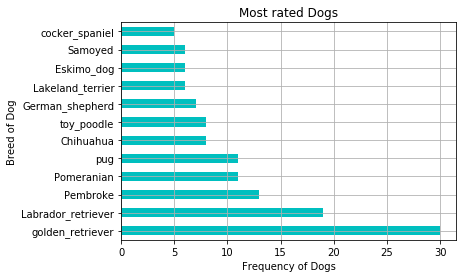

In [63]:
famous.plot(kind='barh', color='c');
plt.xlabel('Frequency of Dogs');
plt.ylabel('Breed of Dog');
plt.title('Most rated Dogs');
plt.grid()

Insight 2: Most famous dog stage

In [64]:
hm=data.groupby('dogs_stage').mean().favorite_count

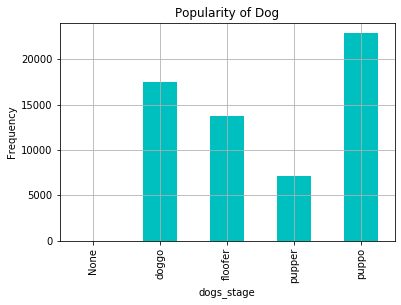

In [65]:
plt.title('Popularity of Dog')
plt.xlabel('Dogs Stage')
plt.ylabel('Frequency')
hm.plot(kind='bar',color='c');
plt.grid()

<b>Insight 3:</b> Relationship between Retweet and Favorite.

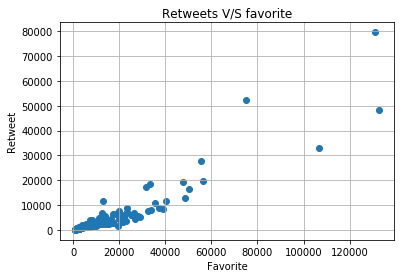

In [66]:
plt.scatter(data['favorite_count'], data['retweet_count']);
plt.xlabel('Favorite');
plt.ylabel('Retweet');
plt.title('Retweets V/S favorite');
plt.grid()